In [1]:
# Import keras library
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
# Import numpy library
import numpy as np
# Import loadmat function
from scipy.io import loadmat
# Import split function
from sklearn.model_selection import train_test_split
# Import matplotlib library
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Download SVHN data
# Notes: It's a mat file, as a dictionary 
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')
print(train['X'].shape, train['y'].shape)
print(test['X'].shape, test['y'].shape)

--2020-07-12 17:53:00--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  20.2MB/s    in 12s     

2020-07-12 17:53:12 (15.0 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2020-07-12 17:53:13--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  14.0MB/s    in 6.2s    

2020-07-12 17:53:19 (9.84 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [3]:
# Convert label 10 into 0, as requested
train['y'][train['y']==10] = 0
test['y'][test['y']==10] = 0

In [4]:
# Convert to a standard format
X_train, y_train = np.transpose(train['X'],(3,0,1,2)), train['y'][:,0]
X_test, y_test = np.transpose(test['X'],(3,0,1,2)), test['y'][:,0]
# Create validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.15)
# Print dimensions
print("Train dimensions", X_train.shape, y_train.shape)
print("Validation dimensions", X_validation.shape, y_validation.shape)
print("Test dimensions", X_test.shape, y_test.shape)

Train dimensions (62268, 32, 32, 3) (62268,)
Validation dimensions (10989, 32, 32, 3) (10989,)
Test dimensions (26032, 32, 32, 3) (26032,)


In [5]:
# Range between 0 and 1
X_train = X_train.astype('float32')/255
X_validation = X_validation.astype('float32')/255
X_test = X_test.astype('float32')/32
# Normalize
mean = np.mean(X_train, axis = (0,1,2,3))
std = np.std(X_train, axis = (0,1,2,3))
X_train = (X_train - mean)/(std + 1e-7)
X_validation = (X_validation - mean) / (std + 1e-7)
X_test = (X_test - mean) / (std + 1e-7)

In [6]:
# One hot encode
y_train = np_utils.to_categorical(y_train,10)
y_validation = np_utils.to_categorical(y_validation,10)
y_test = np_utils.to_categorical(y_test,10)

In [7]:
#Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

In [8]:
model = Sequential()
#Conv1
model.add(Conv2D(32,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Conv2
model.add(Conv2D(32,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Pool + dropout
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Conv3
model.add(Conv2D(64,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Conv4
model.add(Conv2D(64,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Pool + dropout
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#Conv5
model.add(Conv2D(128,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Conv6
model.add(Conv2D(128,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Pool + dropout
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#Flatten and add dense layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

In [9]:
checkpointer = ModelCheckpoint(filepath='model.200epochs.hdf5',verbose=1,save_best_only=True)
optimizer=keras.optimizers.adam(learning_rate=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=128),callbacks=[checkpointer],steps_per_epoch=X_train.shape[0]//128,epochs=200,verbose=2,validation_data=(X_validation,y_validation))

Epoch 1/200
 - 55s - loss: 3.0451 - accuracy: 0.1984 - val_loss: 2.0303 - val_accuracy: 0.2962

Epoch 00001: val_loss improved from inf to 2.03030, saving model to model.200epochs.hdf5
Epoch 2/200
 - 49s - loss: 2.2475 - accuracy: 0.3327 - val_loss: 1.4539 - val_accuracy: 0.5146

Epoch 00002: val_loss improved from 2.03030 to 1.45385, saving model to model.200epochs.hdf5
Epoch 3/200
 - 48s - loss: 1.9113 - accuracy: 0.4217 - val_loss: 1.1659 - val_accuracy: 0.6288

Epoch 00003: val_loss improved from 1.45385 to 1.16593, saving model to model.200epochs.hdf5
Epoch 4/200
 - 48s - loss: 1.6120 - accuracy: 0.5038 - val_loss: 0.9006 - val_accuracy: 0.7204

Epoch 00004: val_loss improved from 1.16593 to 0.90059, saving model to model.200epochs.hdf5
Epoch 5/200
 - 48s - loss: 1.3727 - accuracy: 0.5756 - val_loss: 0.7637 - val_accuracy: 0.7638

Epoch 00005: val_loss improved from 0.90059 to 0.76375, saving model to model.200epochs.hdf5
Epoch 6/200
 - 48s - loss: 1.1893 - accuracy: 0.6293 - val_

In [10]:
scores = model.evaluate(X_test,y_test,batch_size=128,verbose=1)
print('\nTest score %.3f loss %.3f' %(scores[1]*100,scores[0]))

26032/26032 [==============================] - 4s 172us/step

Test score 82.575 loss 0.664


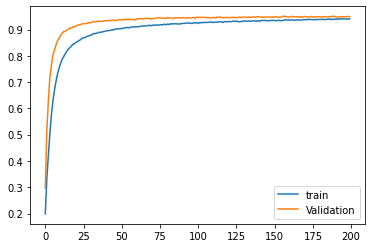

In [11]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()